# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. **Area:** Gives the number of pixels within the boundaries of the raisin.
2. **Perimeter:** It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. **MajorAxisLength:** Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. **MinorAxisLength:** Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. **Eccentricity:** It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. **ConvexArea:** Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. **Extent:** Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. **Class:** Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
%matplotlib inline
from ipywidgets import interact

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,log_loss,recall_score,accuracy_score,precision_score,f1_score

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Exploratory Data Analysis and Visualization

In [175]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [176]:
df.shape

(900, 8)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [178]:
df.duplicated().sum()

0

In [179]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [180]:
df["Class"].value_counts()
# Datamızın target feature'u balance dağılmış. Accuracy score üzerinden gidebiliriz.

Kecimen    450
Besni      450
Name: Class, dtype: int64

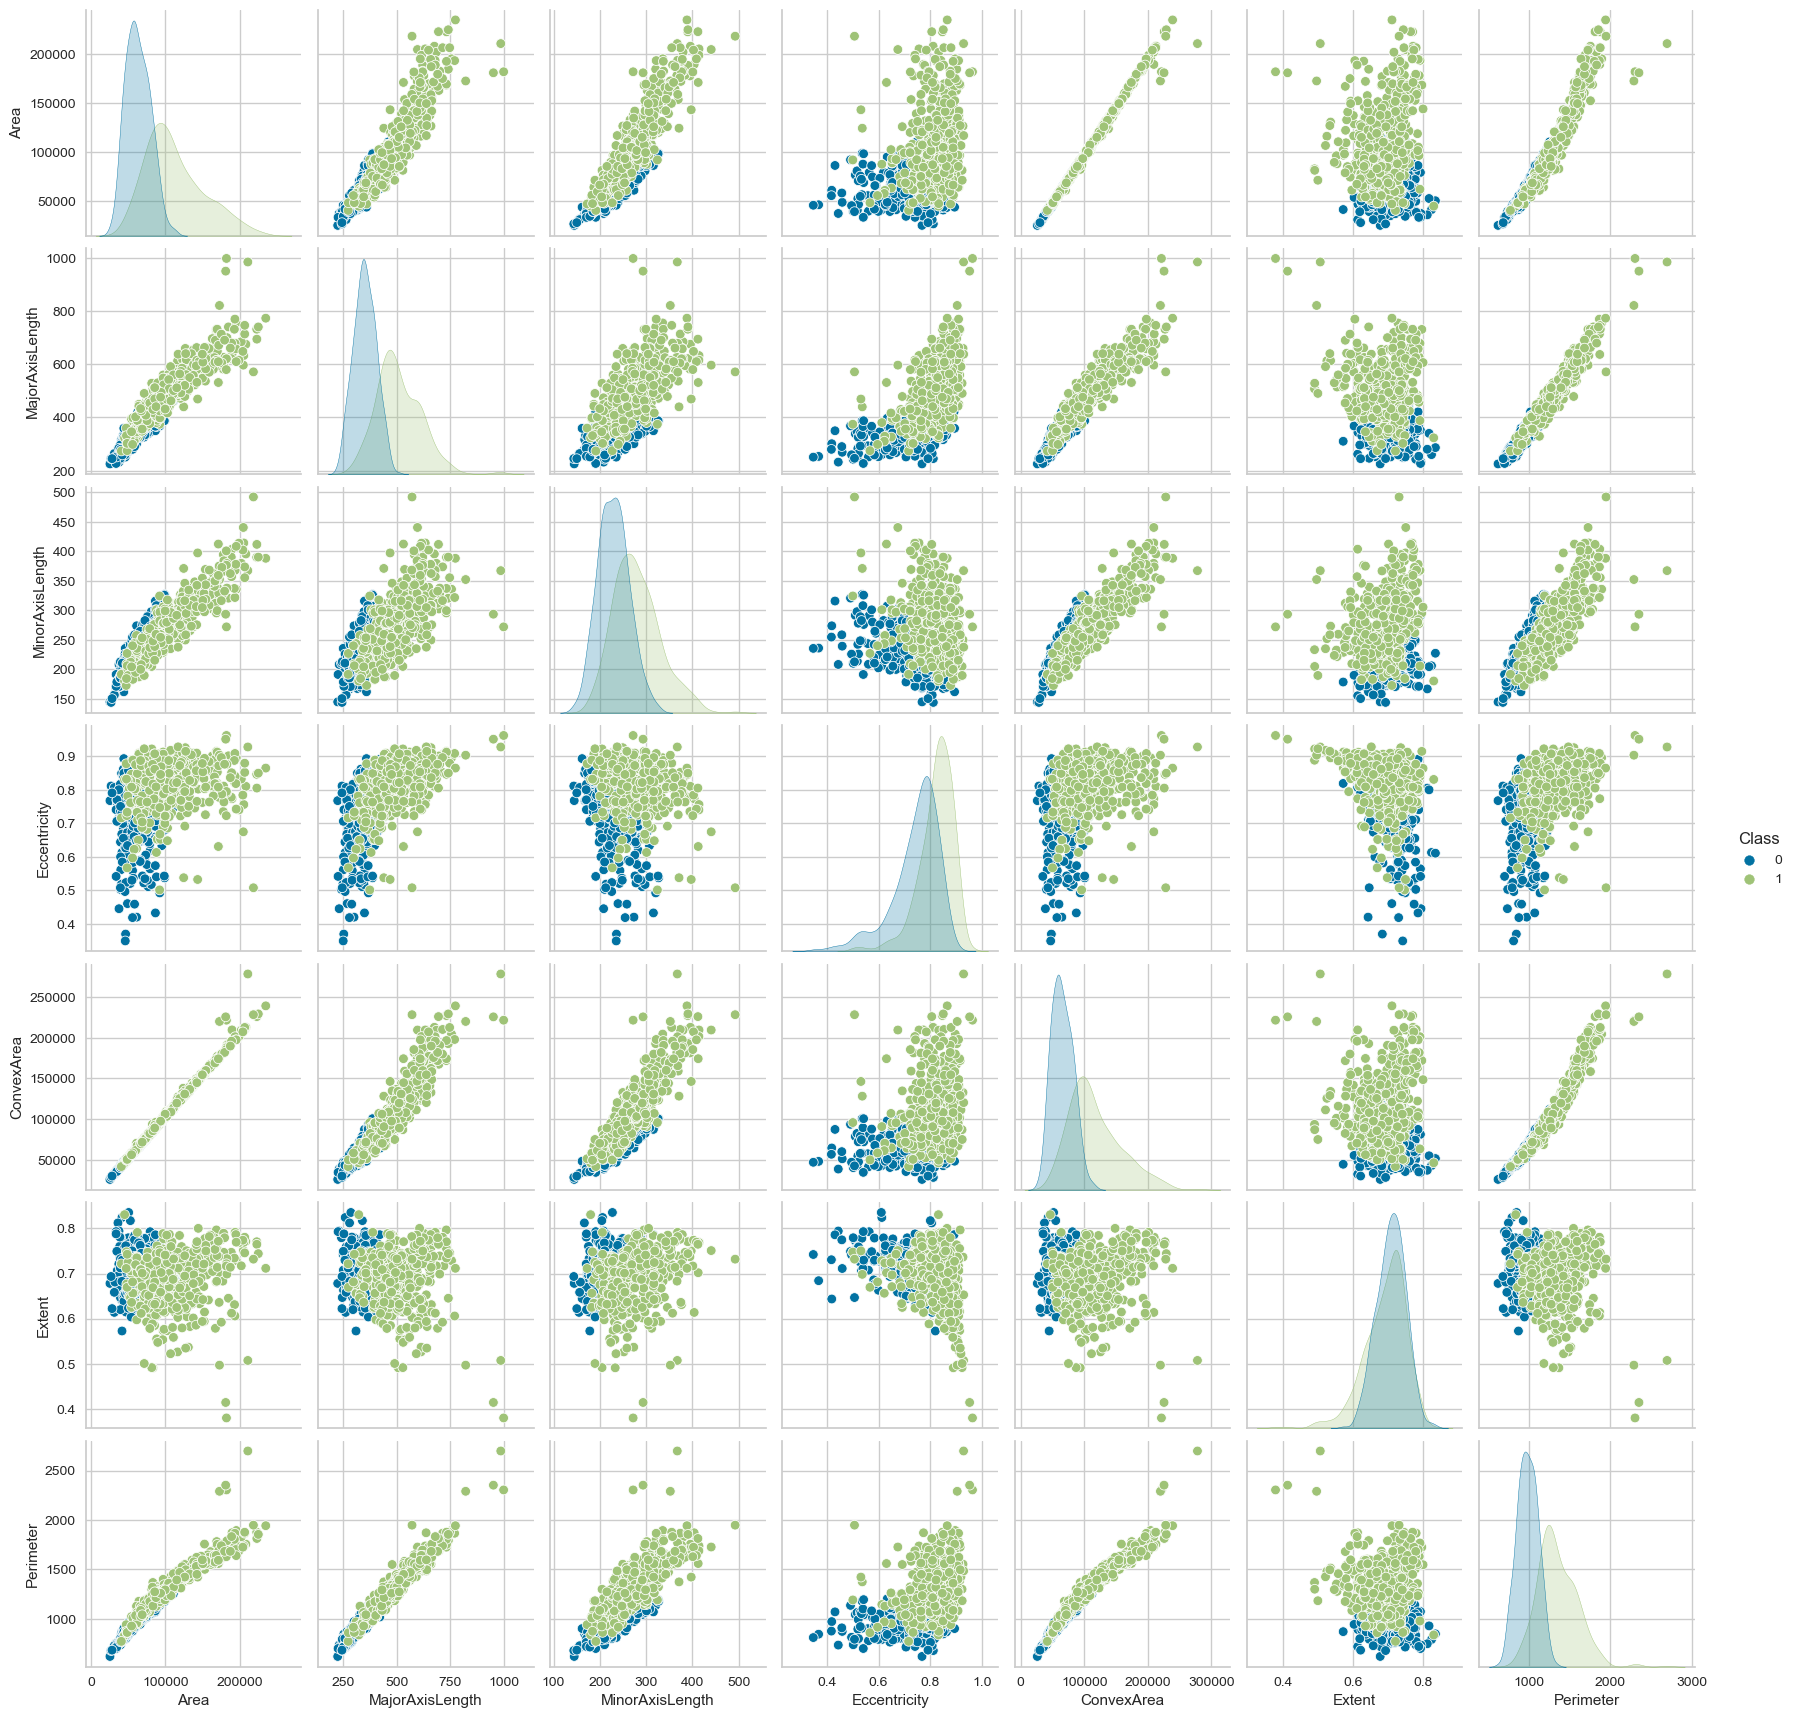

In [240]:
sns.pairplot(df, hue = "Class")

In [181]:
df.head(2)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen


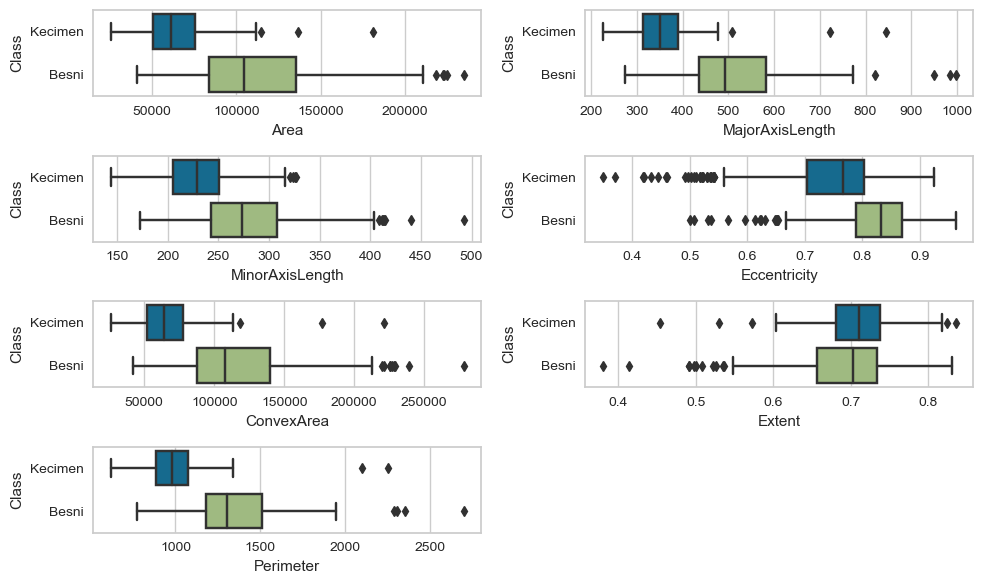

In [182]:
plt.figure(figsize=(10, 6))
i = 1
for column in df.drop(columns="Class"):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x= column, y = "Class")
    i += 1
plt.tight_layout()

In [183]:
drop_index = []

In [184]:
list(df.loc[(df["Class"] == "Kecimen") & (df["Area"] > 120000), "Area"].index)

[85, 290]

In [185]:
drop_index += list(df.loc[(df["Class"] == "Kecimen") & (df["Area"] > 120000), "Area"].index)

In [186]:
drop_index

[85, 290]

In [187]:
df.drop(index=drop_index, inplace=True)

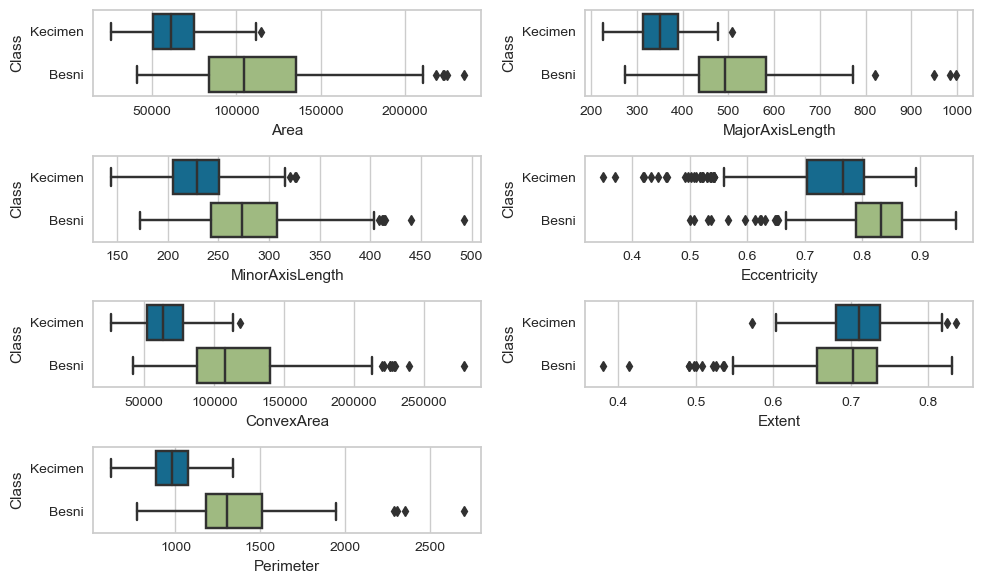

In [188]:
plt.figure(figsize=(10, 6))
i = 1
for column in df.drop(columns="Class"):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x= column, y = "Class")
    i += 1
plt.tight_layout()

In [189]:
df.shape

(898, 8)

In [190]:
df["Class"] = df["Class"].map({"Kecimen" : 0, "Besni" : 1})

## Train | Test Split and Scaling

* for train_test_split use fallowing arguments:
    * train_size: 0.2
    * stratify: True
    * random_state: 10    
* Use StandardScaler to scale the data.

In [191]:
X = df.drop(columns="Class")
y = df["Class"]

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [193]:
scaler = StandardScaler()

# Logistic Regression

* Train the model using the training set with the default parameters.

In [194]:
log_model = LogisticRegression()

In [195]:
operations = [("scaler", scaler), ("log_model", log_model)]

In [196]:
pipe_model = Pipeline(steps = operations)

In [197]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [198]:
y_pred = log_model.predict(X_test)

In [199]:
y_pred_proba = log_model.predict_proba(X_test)

## Model Performance
*Check the accuracy of the model using the train and test set by given eval_metric function.

In [200]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [201]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test) 

Test_Set
[[82  8]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        90
           1       0.90      0.84      0.87        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[315  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       358
           1       0.88      0.85      0.86       360

    accuracy                           0.87       718
   macro avg       0.87      0.87      0.87       718
weighted avg       0.87      0.87      0.87       718



### Cross Validate

* Use the cross_val_score function to evaluate the model using the train set.

In [202]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=["precision", "recall", "f1", "accuracy"],
                        cv = 10, error_score="raise")
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# Burada error_score = "raise" yapmasaydık ve target feature'u numeric'e çevirmeseydik hata alacaktık.
# Ancak raise yazmasak ve target feature'u numeric'e çevirmesek sonuç NAN dönecekti ve nolduğunu anlayamayacaktık.
# Eğer cross_val sonrası score'lar Nan değer dönüyorsa error_score ="raise" yapın ve hataya göre düzeltme yapın.

test_precision    0.881707
test_recall       0.850000
test_f1           0.864624
test_accuracy     0.866315
dtype: float64

### GridSearchCV
* Use the GridSearchCV function to find the best parameters for the model.

In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
model = Pipeline(steps=operations)

In [227]:
param_grid = {
    "log_model__penalty" : ["l1", "l2"],
    "log_model__C" : [np.logspace(-1, 5, 20), 1],
    "log_model__class_weight" : ["balanced", None],
    "log_model__solver" : ["lbfgs", "liblinear", "sag", "saga"]
}

In [228]:
grid_model = GridSearchCV(estimator = model,
                          param_grid = param_grid,
                          cv = 10,
                          scoring = "accuracy",
                          n_jobs = -1)

In [229]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 297 ms
Wall time: 414 ms


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [230]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': None,
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [231]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[82  8]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        90
           1       0.91      0.89      0.90        90

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180


Train_Set
[[315  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       358
           1       0.88      0.85      0.86       360

    accuracy                           0.87       718
   macro avg       0.87      0.87      0.87       718
weighted avg       0.87      0.87      0.87       718



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

* Use the roc_curve function to calculate the ROC curve and compare logistic regression models with default and tuned parameters. 

In [237]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score, average_precision_score

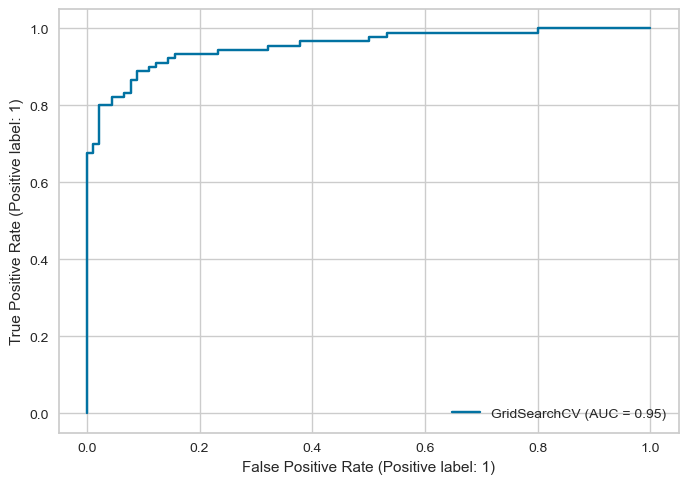

In [238]:
plot_roc_curve(grid_model, X_test, y_test);

## KNN (K-Nearest Neighbors)
* Train the model using the training set with the default parameters.

In [241]:
from sklearn.neighbors import KNeighborsClassifier

In [242]:
knn_model = KNeighborsClassifier()

In [243]:
operations = [("scaler", scaler), ("knn", knn_model)]

In [244]:
pipe_model = Pipeline(steps=operations)

In [245]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [246]:
knn_pred = pipe_model.predict(X_test)

In [247]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [16 74]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.82      0.86        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[330  28]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       358
           1       0.92      0.85      0.88       360

    accuracy                           0.89       718
   macro avg       0.89      0.89      0.89       718
weighted avg       0.89      0.89      0.89       718



### Elbow Method for Choosing Reasonable K Values
* Use the elbow method to find the optimal number of neighbors.

In [249]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [254]:
test_error_rates = []


for k in range(1,30):

    model = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=k))]) # p=1,weights="uniform",metric="minkowski"

    scores = cross_validate(model, X_train, y_train, scoring = ['accuracy'], cv = 10,error_score="raise")
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    
    test_error = 1 - accuracy_mean 
    test_error_rates.append(test_error)

In [258]:
test_error_rates1 = []


for k in range(1,30):
    knn_model = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=k))])
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates1.append(test_error)

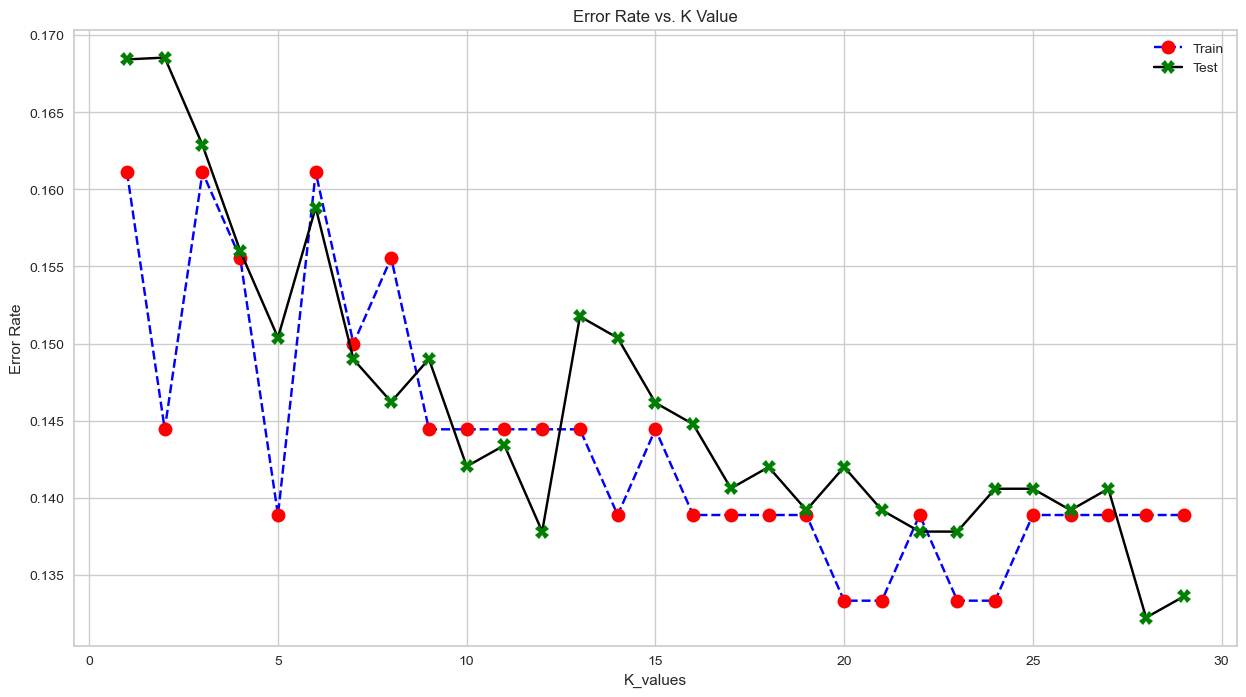

In [261]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates1, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), test_error_rates, color='black', linestyle='-', marker='X',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.legend(labels=["Train", "Test"])

### Scores by Various K Values
* Select some k values smaller and bigger than the optimal k value to see how the model performs.

In [262]:
# Burada k değerini manual olarak seçmek istiyoruz çünkü GridSearch min. hatanın olduğu k değerini seçiyor.
# Bu durumda k değeri çok yüksek çıkıyor ve işlem maliyeti oluşuyor.
# Genel yaklaşım k değerini manual olarak seçmektir.

In [263]:
# Burada  k değerini 5 seçiyorum ve skor'dan 1 puan taviz veriyorum

In [264]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])   
knn.fit(X_train,y_train)
print('WITH 5K=\n')
eval_metric(knn, X_train, y_train, X_test, y_test)

WITH 5K=

Test_Set
[[81  9]
 [16 74]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.82      0.86        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[330  28]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       358
           1       0.92      0.85      0.88       360

    accuracy                           0.89       718
   macro avg       0.89      0.89      0.89       718
weighted avg       0.89      0.89      0.89       718



### Cross Validate

In [266]:
model =Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.887504
test_recall       0.805556
test_f1           0.843382
test_accuracy     0.849609
dtype: float64


### Gridsearch Method for Choosing Reasonable K Values
* Use the GridSearchCV function to find the best parameters for the model. this method is brute force method to find the best parameters, and it takes a long time to run for KNN. You will get different k values because of you will use different parameters, and also gridsearch method tries to find minimum error. Sometimes it get larger k values for optimal but for  sake of reduce complexity we use the elbow method to find the optimal k value.

In [269]:
operations = [("scaler", scaler), ("knn", KNeighborsClassifier())]

In [271]:
pipe_model = Pipeline(steps = operations)

In [276]:
param_grid = {
    "knn__n_neighbors" : range(1, 30),
    "knn__weights" : ["uniform", "distance"],
    "knn__p" : [1, 2, 3, 4]
}

In [277]:
grid_model = GridSearchCV(estimator = pipe_model,
                          param_grid = param_grid,
                          cv = 10,
                          scoring = "accuracy",
                          n_jobs = -1)

In [278]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 30),
                         'knn__p': [1, 2, 3, 4],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [279]:
grid_model.best_params_

{'knn__n_neighbors': 28, 'knn__p': 2, 'knn__weights': 'uniform'}

In [280]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [16 74]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.82      0.86        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[327  31]
 [ 63 297]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       358
           1       0.91      0.82      0.86       360

    accuracy                           0.87       718
   macro avg       0.87      0.87      0.87       718
weighted avg       0.87      0.87      0.87       718



In [281]:
# Burada manuel olarak k=5 seçtiğimizdeki accuracy score ile gridsearch'ün seçtiği k = 28 arasında test accuracy  farkı 0.

### Evaluating ROC Curves and AUC
*Use the roc_curve function to calculate the ROC curve and compare KNN models with default and tuned parameters.

In [282]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [285]:
model = KNeighborsClassifier(n_neighbors=28, p=2, metric="minkowski", weights="uniform") # best gridsearch model
 
knn_model = Pipeline([("scaler",scaler),("knn",model)])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=28))])

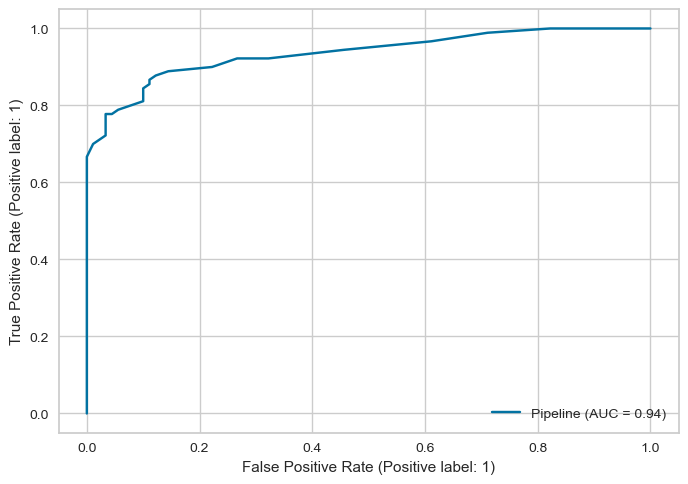

In [286]:
plot_roc_curve(knn_model, X_test, y_test) 

In [287]:
model = KNeighborsClassifier(n_neighbors=5) # best elbow model

knn_model = Pipeline([("scaler",scaler),("knn",model)])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

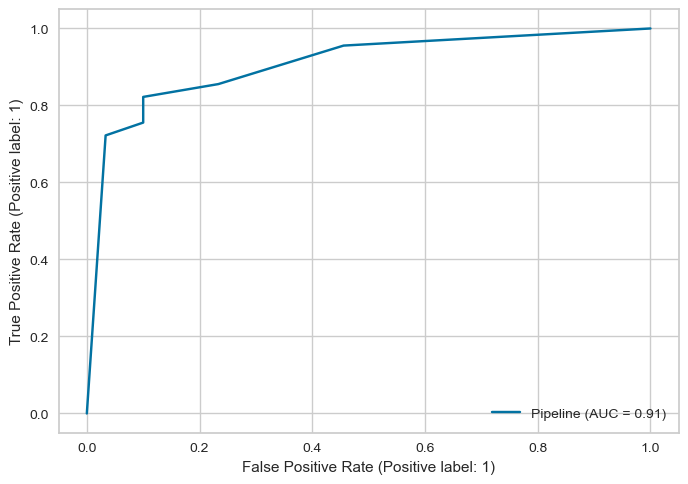

In [288]:
plot_roc_curve(knn_model, X_test, y_test)  

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___